
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Trabajo práctico entregable - Parte 2

**Bloque de funciones**

In [33]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [34]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [35]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [36]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [37]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [38]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [39]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

In [40]:
#Fuente: https://scientificallysound.org/2017/05/16/independent-t-test-python/

from scipy.stats import ttest_ind
from scipy.stats import t

#print(ttest_ind(numpy.array(groupA),numpy.array(groupB),equal_var = False))
alpha = 0.05
mean_diff = groupA.mean()-groupB.mean()
nA = len(groupA)
nB = len(groupB)
dof = nA + nB - 2
stdA = groupA.std()
stdB = groupB.std()
std_AB = numpy.sqrt(((nA - 1)*(stdA)**2 + (nB - 1)*(stdB)**2) / dof)

t_val = t.ppf([1-alpha/2], dof)[0]

MoE = t_val * std_AB * numpy.sqrt(1/nA + 1/nB)
li = mean_diff - MoE
ls = mean_diff + MoE
print(f'La diferencia entre los grupos es de {mean_diff:3.2f} con el siguiente intervalo de confianza al {100-alpha*100}%: [{li:3.2f} - {ls:3.2f}]')

La diferencia entre los grupos es de 23262.37 con el siguiente intervalo de confianza al 95.0%: [16361.78 - 30162.97]


#### La diferencia entre los grupos es de 23262.37 con el siguiente intervalo de confianza al 95.0%: [16361.78 - 30162.97]. Si se realiza un test de hipótesis con alpha = 0.05, cualquier resultado que caiga dentro de este intervalo nos dirá que no se puede rechazar la hipótesis nula ($H_0$), que dice que no hay diferencia entre las medias. Si en cambio realizamos el test de hipótesis y obtenemos un resultado que cae por fuera de este intervalo, y considerando que trabajamos bajo el supuesto de que $H_0$ es verdadera, entonces podemos rechazarla.

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos compenentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0: \mu_A = \mu_B$

**Estadístico (Pivote)**
  * Identificar el estadístico: El estadístico a utilizar es la diferencia de medias muestrales, o sea $(\overline{X}_A - \overline{X}_B)$
  * Escribir qué distribución tiene bajo $H_0$ : Si la $H_0$ es verdadera, esta tiene una distribucion t , centrada en el cero.


### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.
3. Los dos grupos de nuestra muestra tienen tamaños muy distintos. ¿Esto afecta al test?

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

In [41]:
from scipy import stats
res = stats.ttest_ind(groupA,groupB, equal_var= False)

print(f'p-valor obtenido: {res[1]:3.25f}')

res

p-valor obtenido: 0.0000000000000000000008605


Ttest_indResult(statistic=9.697205976350673, pvalue=8.605197322133209e-22)

Interpretación del resultado:El p-valor del test de diferencia de medias es menor que alpha, con lo cual se rechaza $H_0$. Hay evidencia (con alto nivel de significancia) en los datos para rechazar que las medias sean iguales

En relación a los tamaños distintos de los grupos, entendemos que esta diferencia no afecta al test, siempre y cuando las poblaciones tengan una cantidad mínima de muestras que asegure determinado nivel de potencia del test. Para justificar esto nos apoyamos en el análisis del punto 2.3 (Potencia del Test). Por ejemplo, para trabajar con una potencia del test de 0.9, necesito que mi población A tenga 398.79610014029686 muestras y que mi población B tenga 73.79591385773718 muestras (ver cálculos más abajo)

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [28]:
from statsmodels.stats.power import tt_ind_solve_power

In [29]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
power = 0.9
ratio = len(groupB) / len(groupA)

potencia = tt_ind_solve_power(effect_size=effect_size, alpha=alpha,power = power, ratio=ratio, nobs1= None)

print(f'Para trabajar con una potencia del test de {power}, necesito que mi población A tenga {potencia} muestras y que mi población B tenga {potencia*ratio} muestras')

Para trabajar con una potencia del test de 0.9, necesito que mi población A tenga 398.79610014029686 muestras y que mi población B tenga 73.79591385773718 muestras


## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


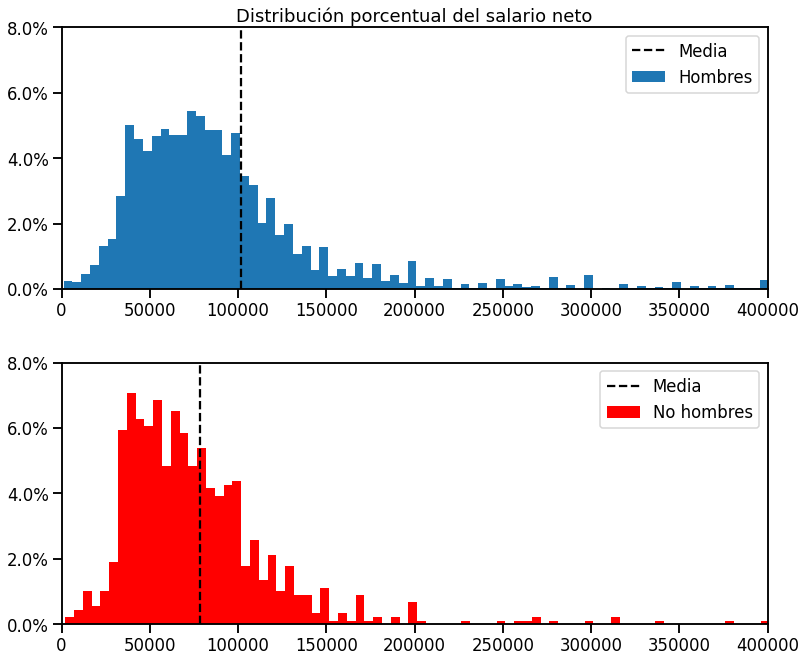

In [68]:
binsiz = 5000
bins_A = int(numpy.ceil((numpy.max(groupA) - numpy.min(groupA))/binsiz))
bins_B = int(numpy.ceil((numpy.max(groupB) - numpy.min(groupB))/binsiz))

from matplotlib.ticker import PercentFormatter
plt.figure(figsize=(12, 10))
plt.subplot(2,1,1)
plt.hist(groupA, weights=numpy.ones(len(groupA)) / len(groupA),label = 'Hombres',bins = bins_A)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.axvline(groupA.mean(), color = 'black',linestyle='--', label=f'Media')
plt.legend()
plt.xlim(0,4e5)
plt.ylim(0,0.08)
plt.tight_layout(2)
plt.title("Distribución porcentual del salario neto")


plt.subplot(2,1,2)
plt.hist(groupB, weights=numpy.ones(len(groupB)) / len(groupB),label = 'No hombres',bins = bins_B,color = 'red')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.axvline(groupB.mean(), color = 'black',linestyle='--', label=f'Media')
plt.legend()
plt.xlim(0,4e5)
plt.ylim(0,0.08)
plt.tight_layout(2)
# plt.title("Distribución porcentual del salario neto para el grupo No-Hombres")


Text(0.5, 1.0, 'Distribución de los salarios para programadores hombres y no hombres \n Diagrama de cajas')

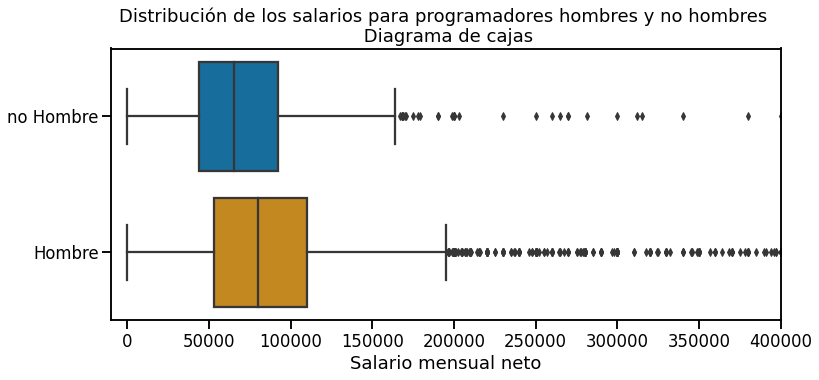

In [69]:
def is_hombre(gender):
  if gender == 'Hombre':
    return 'Hombre'
  else:
    return 'no Hombre'
df['es_hombre'] = df.profile_gender.apply (lambda x : is_hombre(x))
plt.figure(figsize=(12, 5))
seaborn.boxplot(data=df, x='salary_monthly_NETO', y='es_hombre', palette="colorblind")
plt.ticklabel_format(style='plain', axis='x')
plt.ylabel('')
plt.xlabel('Salario mensual neto')
plt.xlim([-10000,4e5])
plt.title("Distribución de los salarios para programadores hombres y no hombres \n Diagrama de cajas")
